In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from matplotlib.patches import Arrow

import seaborn as sns
import pandas as pd 
import pickle
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.datasets import make_classification

from sklearn import tree

! pip install minisom
import minisom
from minisom import MiniSom
import random
import matplotlib
from sklearn.cluster import KMeans
import pickle

  Using cached MiniSom-2.2.9-py3-none-any.whl


## Section 1

In [2]:
solubility_data = pd.read_csv('curated-solubility-dataset.csv')
solubility_data.keys()
# check if there is any NaN values
solubility_data.isna().any()
# This dataset has different group of data merged into one set, 
# which means one molecule could appear multiple times with different solubility values in this dataset
# Since we want only one solubility value, we will filter out only Group 1 data for our project
solubility_data[solubility_data['Ocurrences'] == 1]

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,I-77,sparfloxacin,InChI=1S/C19H22F2N4O3/c1-8-5-24(6-9(2)23-8)17-...,DZZWHBIBMUVIIW-DTORHVGOSA-N,C[C@H]1CN(C[C@@H](C)N1)C1=C(F)C2=C(C(=O)C(=CN2...,-3.370000,0.0,1,G1,392.406,...,3.0,150.0,2.0,2.0,2.0,4.0,100.59,159.278381,2.046795e+00,1038.121206
9975,I-80,sulfasalazine,InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...,NCEXYHBECQHGNR-QZQOTICOSA-N,C(=O)(O)c1cc(ccc1O)\N=N\c1ccc(cc1)S(=O)(Nc1ccc...,-6.140000,0.0,1,G1,398.400,...,6.0,142.0,3.0,0.0,0.0,3.0,141.31,159.637587,1.765846e+00,1130.397370
9977,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.0,1,G1,264.369,...,8.0,106.0,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548e+00,374.236893
9978,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.0,1,G1,444.440,...,2.0,170.0,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922e+00,1148.584975


In [3]:
category = []
for i in solubility_data["Solubility"]:
    if i>=0:
        category.append('highly soluble')
    elif -2<=i<0:
        category.append('soluble')
    elif -4<=i<-2:
        category.append('slightly soluble')
    else:
        category.append('insoluble')        


In [4]:
solubility_data["solubility category"]=category

In [5]:
solubility_data.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility category
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334,slightly soluble
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248,slightly soluble
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065,slightly soluble
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666,slightly soluble
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934,insoluble


# Project introduction

Aqueous solubility is one common yet very important porperty of organic molecules. Knowing how to acurately predict and adjust the aquesous solubility (AS) is useful in many applications. For example, the AS of a drug is an important factor affecting its bioavailability. In this project, we are trying to build up the connection between the AS of organic molecules and their chemcial and structural characteristics. Our goal is to develop a model using the available features in the dataset to accurately predict and classify the AS of each organic molecule, serving as a guidance for future molecular designs. 

First, to simplify our model, I want to classify the data into highly soluble molecules (defined as intrinsic AS: LogS>0), sparingly soluble molecules(-2<LogS<0), and insoluble molecules(logS<-4). Our hypothesis is that the AS of a single organic molecule is a combinatorial result of several influential factors. Therefore, we generated a heat map below to visualize the correlation between each two features in the dataset.

From the standard correlation coefficient(as heat map shown below), it is observed the correlation between solubility and each single characteristic is indeed very weak. This could be partialy due to that I haven't clean up the dataset by setting up controls or grouping. Nevertheless, it demonstrated that no single characteristic can easily affect the AS of an organic molecule. There must exist a more complicated model to ppredict the AS.

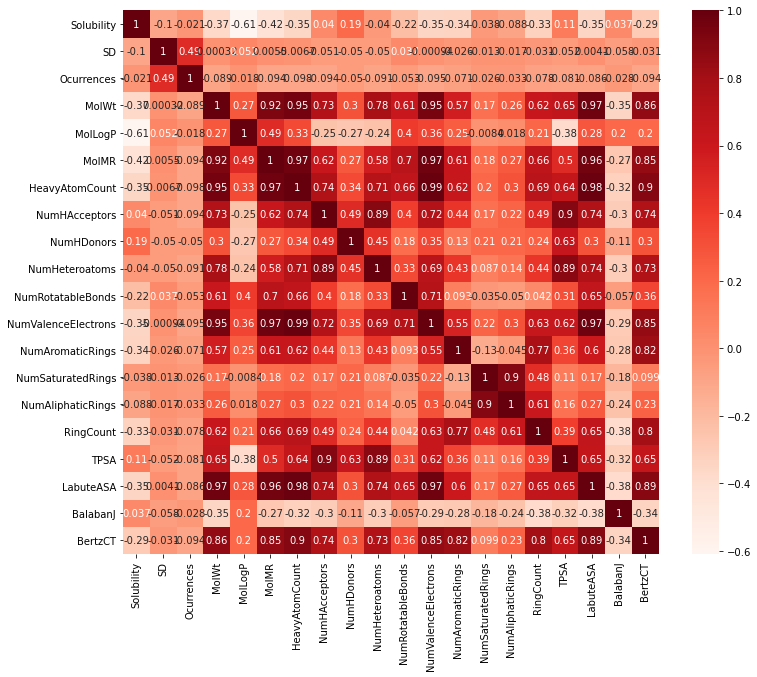

In [6]:
plt.figure(figsize=(12,10))
cor = solubility_data.dropna().corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Regression

r2_score: 0.27517536482964855
mse: 4.0645220321797915
intercept: [-1.38650313]
coefficient: [[-0.00599793 -0.08549054  0.33418433]]


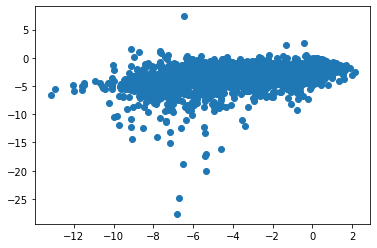

In [7]:
regr1 = linear_model.LinearRegression() 
X1 = solubility_data[['MolWt', 'MolMR', 'HeavyAtomCount']]
Y1 = solubility_data[['Solubility']]
regr1.fit(X1, Y1)

from sklearn.metrics import r2_score
r2_score=r2_score(solubility_data['Solubility'], regr1.predict(X1))

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(solubility_data['Solubility'], regr1.predict(X1))

intercept=regr1.intercept_
coefficient=regr1.coef_

print('r2_score:',r2_score)
print('mse:',mse)
print('intercept:',intercept)
print('coefficient:',coefficient)

plt.scatter(solubility_data['Solubility'], regr1.predict(X1))
plt.show()

r2_score: 0.44835951647416483
mse: 3.0933756805963264
intercept: [-1.54197438]
coefficient: [[-0.0059668  -0.36360352  0.01986578 -0.04440984  0.15384004  0.16188658
  -0.05933327]]


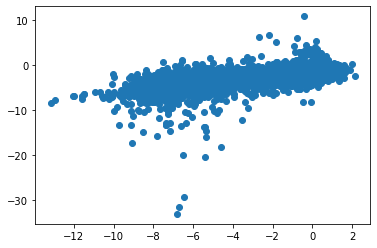

In [8]:
regr1 = linear_model.LinearRegression() 
X1 = solubility_data[['MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms']]
Y1 = solubility_data[['Solubility']]
regr1.fit(X1, Y1)

from sklearn.metrics import r2_score
r2_score=r2_score(solubility_data['Solubility'], regr1.predict(X1))

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(solubility_data['Solubility'], regr1.predict(X1))

intercept=regr1.intercept_
coefficient=regr1.coef_

print('r2_score:',r2_score)
print('mse:',mse)
print('intercept:',intercept)
print('coefficient:',coefficient)

plt.scatter(solubility_data['Solubility'], regr1.predict(X1))
plt.show()

r2_score: 0.5141853614726428
mse: 2.72425108921115
intercept: [-0.58531887]
coefficient: [[-0.00476603 -0.44367598  0.01455881 -0.4734423   0.1085899   0.14979819
  -0.12915866  0.04084007  0.07663386 -0.29964953  0.13950952 -0.04278944
  -0.34243896 -0.00325231 -0.01077072 -0.02663261  0.00447931]]


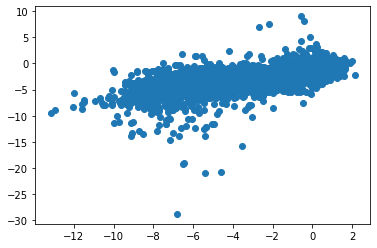

In [9]:
regr1 = linear_model.LinearRegression() 
X1 = solubility_data[['MolWt','MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons','NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT']]
Y1 = solubility_data[['Solubility']]
regr1.fit(X1, Y1)

from sklearn.metrics import r2_score
r2_score=r2_score(solubility_data['Solubility'], regr1.predict(X1))

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(solubility_data['Solubility'], regr1.predict(X1))

intercept=regr1.intercept_
coefficient=regr1.coef_

print('r2_score:',r2_score)
print('mse:',mse)
print('intercept:',intercept)
print('coefficient:',coefficient)

plt.scatter(solubility_data['Solubility'], regr1.predict(X1))
plt.show()

##  Non-linear

r2_score: 0.7018004340727051
mse: 1.6721819967019766


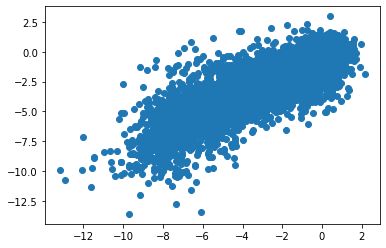

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias=False)
X1_fit = poly.fit_transform(X1)
regr2 = linear_model.LinearRegression() 
regr2.fit(X1_fit, solubility_data['Solubility'])

from sklearn.metrics import r2_score
r2_score=r2_score(solubility_data['Solubility'], regr2.predict(X1_fit))

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(solubility_data['Solubility'], regr2.predict(X1_fit))

intercept=regr2.intercept_
coefficient=regr2.coef_

print('r2_score:',r2_score)
print('mse:',mse)


plt.scatter(solubility_data['Solubility'], regr2.predict(X1_fit))
plt.show()

r2_score: 0.8227328618693652
mse: 0.9940420807359656


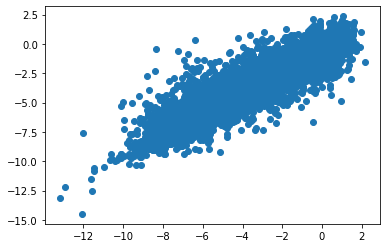

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3, include_bias=False)
X1_fit = poly.fit_transform(X1)
regr2 = linear_model.LinearRegression() 
regr2.fit(X1_fit, solubility_data['Solubility'])

from sklearn.metrics import r2_score
r2_score=r2_score(solubility_data['Solubility'], regr2.predict(X1_fit))

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(solubility_data['Solubility'], regr2.predict(X1_fit))

intercept=regr2.intercept_
coefficient=regr2.coef_

print('r2_score:',r2_score)
print('mse:',mse)


plt.scatter(solubility_data['Solubility'], regr2.predict(X1_fit))
plt.show()

r2_score: 0.9145178162917674
mse: 0.47934935180465255


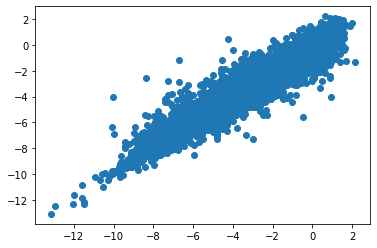

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4, include_bias=False)
X1_fit = poly.fit_transform(X1)
regr2 = linear_model.LinearRegression() 
regr2.fit(X1_fit, solubility_data['Solubility'])

from sklearn.metrics import r2_score
r2_score=r2_score(solubility_data['Solubility'], regr2.predict(X1_fit))

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(solubility_data['Solubility'], regr2.predict(X1_fit))

intercept=regr2.intercept_
coefficient=regr2.coef_

print('r2_score:',r2_score)
print('mse:',mse)


plt.scatter(solubility_data['Solubility'], regr2.predict(X1_fit))
plt.show()

To further clean up the data, I picked several characteristics that would potentially affect the AS of the molecules and visualized their relations with AS using the scatter plot, including octonal-water partition coefficient(MolLogP), topological Polar Surface Area(TPSA), number of heteroatoms and H acceptor/ donors numbers etc. Based on the plot, I want to find some useful patterns within the data and decide how I should proceed the data processing.

Text(0.5, 1.0, 'Solubility vs TPSA')

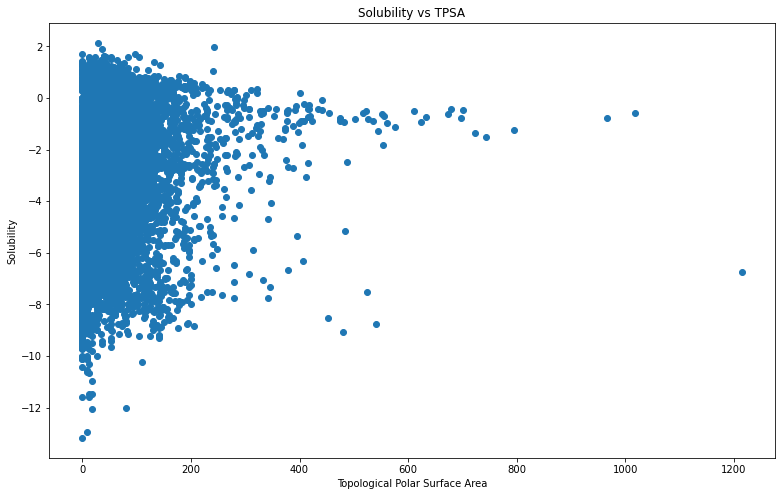

In [13]:
TPSA = solubility_data['TPSA']
Solubility = solubility_data['Solubility']
plt.figure(figsize = (13,8))
plt.scatter(TPSA,Solubility,label='Original Datapoints')
plt.ylabel('Solubility')
plt.xlabel('Topological Polar Surface Area')
plt.title('Solubility vs TPSA')

Text(0.5, 1.0, 'TPSA values spread of molecules')

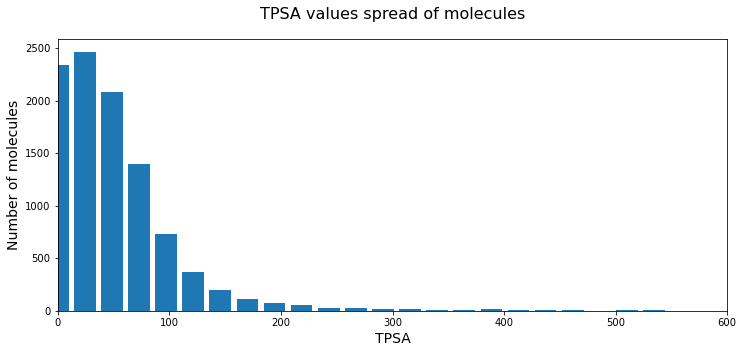

In [14]:
hist_data = solubility_data['TPSA']
kwargs = dict(bins = 50, alpha=1, histtype='bar', rwidth= 0.8, align='left')
plt.figure(figsize=(12, 5))
plt.hist(hist_data, **kwargs)
plt.xlabel('TPSA', fontsize=14)
plt.ylabel('Number of molecules', fontsize=14)
plt.xlim(0, 600)
plt.title('TPSA values spread of molecules', fontsize=16, pad=20)

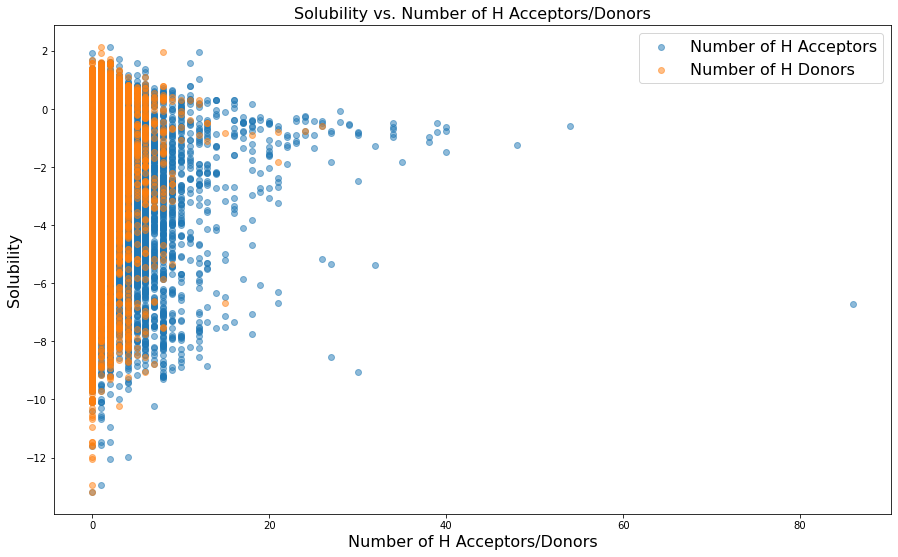

In [15]:
plt.figure(figsize=(15,9))
plt.scatter(solubility_data['NumHAcceptors'],solubility_data['Solubility'], alpha=0.5, label='Number of H Acceptors')
plt.scatter(solubility_data['NumHDonors'],solubility_data['Solubility'], alpha=0.5, label='Number of H Donors')
plt.legend(fontsize=16)
plt.xlabel('Number of H Acceptors/Donors', fontsize=16)
plt.ylabel('Solubility', fontsize=16)
plt.title('Solubility vs. Number of H Acceptors/Donors', fontsize=16)

plt.show()

Text(0.5, 0.92, 'Regression Fitting of First Solubility vs. TPSA and MolLogP')

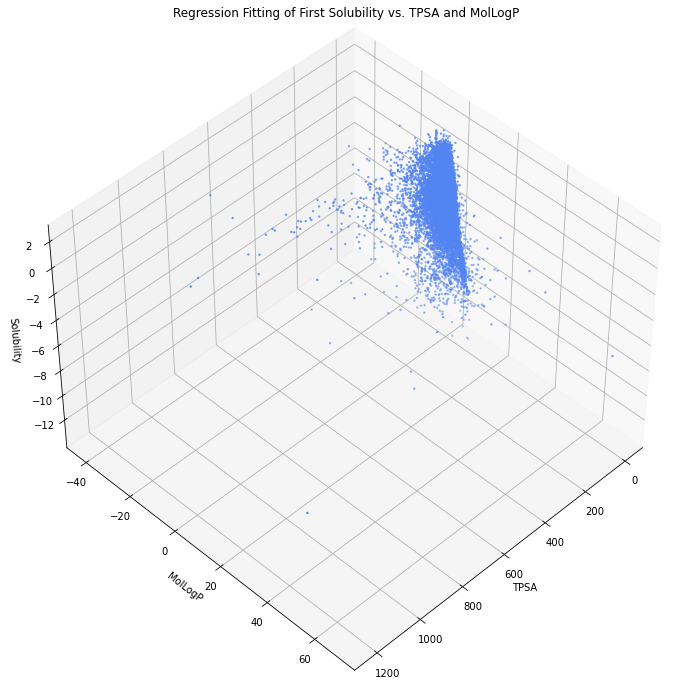

In [16]:
plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d')
plot=ax.scatter3D(solubility_data['TPSA'], solubility_data['MolLogP'], solubility_data['Solubility'], s=2, 
                   c='#5284F2')
ax.view_init(45,45)
ax.set_xlabel('TPSA')
ax.set_ylabel('MolLogP')
ax.set_zlabel('Solubility')
ax.set_zlim()
ax.set_title('Regression Fitting of First Solubility vs. TPSA and MolLogP')

Text(0.5, 0.92, 'Regression Fitting of First Solubility vs. NumHDonors and NumHAcceptors')

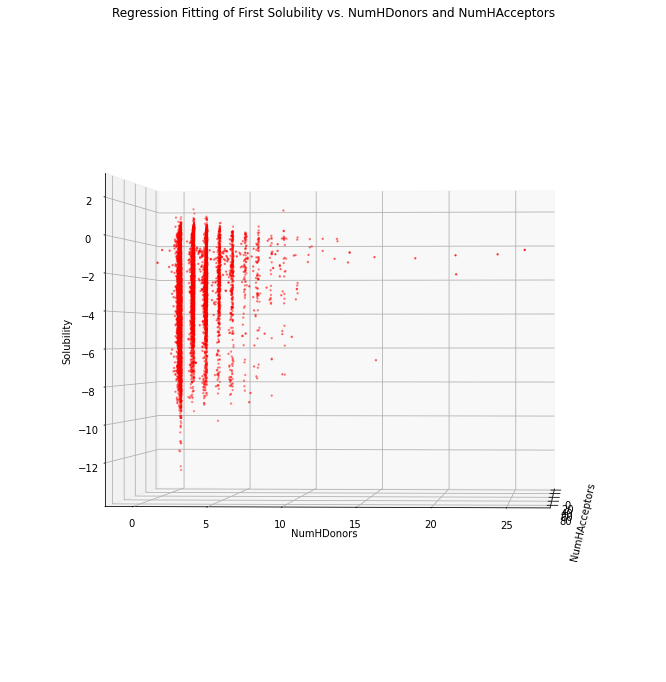

In [17]:
plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d')
plot=ax.scatter3D(solubility_data['NumHAcceptors'], solubility_data['NumHDonors'], solubility_data['Solubility'], s=2, 
                   c='r')
ax.view_init(0,4)
ax.set_xlabel('NumHAcceptors')
ax.set_ylabel('NumHDonors')
ax.set_zlabel('Solubility')
ax.set_zlim()
ax.set_title('Regression Fitting of First Solubility vs. NumHDonors and NumHAcceptors')

From the figures above, it can tell that it is hard to find a clear relations between these features and AS without any data processing or cleaning. Therefore, in the following weeks, I will first control viarables by gourping the data using one or more features. For example, I can gourp the data by TPSA (between 0-20, 20-40, 40-60 etc.) or by number of H donors/acceptors (between 0-5, 5-10, 10-15 etc.). Then investigate the relation (either linear or nonlinear) between each potentially useful feature and the AS. After find the most influential features, I can use multi-linear or nonlinear machine learning to build up a model that have the most accurate prediction on AS of organic molecules.

## Section 2

#### Supervised ML - K-Nearest Neighbor (KNN) Classification

In [18]:
x_knn = solubility_data[["NumHAcceptors",'NumHDonors','TPSA']].astype(float)
y_knn = solubility_data["solubility category"]

#train test splitting
x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

#fit the scaler on the train data to get the mean and standard deviation
scaler = StandardScaler().fit(x_trainknn)

#standardize the training data and testing data using the scaler
x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_trainknn,y_trainknn)

y_predictknn = knn_model.predict(x_testknn) 

#getting test accuracy
knn_model.score(x_testknn,y_testknn)

0.400100150225338

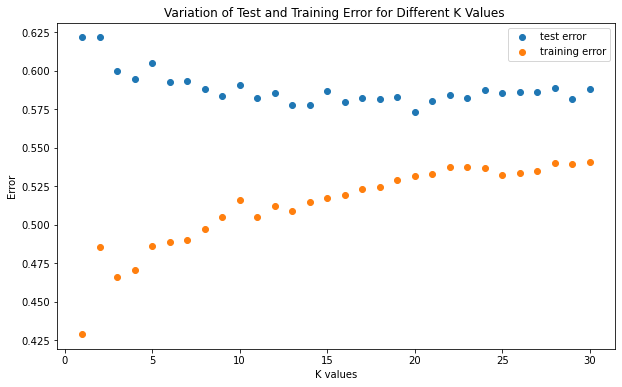

In [20]:
test_error_test = []
test_error_train = []
fig1 = plt.figure(figsize=(10, 6))

for n in range(1,31,1): 
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(x_trainknn,y_trainknn)
    y_predictknn = knn_model.predict(x_testknn) 
    accuracy_test = knn_model.score(x_testknn,y_testknn)
    accuracy_train = knn_model.score(x_trainknn,y_trainknn)
    error_test = 1-accuracy_test
    error_train = 1-accuracy_train
    test_error_test.append(error_test)
    test_error_train.append(error_train)
    
n = np.linspace(1,30,30)
plt.scatter(n, test_error_test, label='test error')
plt.scatter(n, test_error_train, label='training error')
plt.legend()
plt.xlabel('K values')
plt.ylabel('Error')
plt.title('Variation of Test and Training Error for Different K Values ')

plt.show()

In [21]:
kf = KFold(n_splits=5,shuffle=True,random_state=22)
test_error_kfold = 0
knn_model_evaluate = KNeighborsClassifier(n_neighbors=3)

for train_index, test_index in kf.split(x_knn):
    
    scaler_kfold = StandardScaler().fit(x_knn.values[train_index])
    
    #standardize the training data and testing data using the scaler
    x_train_kfold = scaler_kfold.transform(x_knn.values[train_index])
    x_test_kfold = scaler_kfold.transform(x_knn.values[test_index])
    
    y_train_kfold = y_knn[train_index]
    y_test_kfold = y_knn[test_index]
    
    knn_model_evaluate.fit(x_train_kfold,y_train_kfold)
    test_error_kfold += 1-knn_model_evaluate.score(x_test_kfold,y_test_kfold)
    
test_error_kfold /= 5

test_error_kfold

0.6102959549544759

I use three features of Dataset and K value of 3 to do the initial test. The initial results show a low accuracy around 0.4. This test accuracy can't satisfy to classification. 

Then, I try different K values and find the test error and training error. As I increase K value, there is no significant change in test error after K is 3. At the same time, evaluate KNN test error by  K-fold cross validation, which also give a great error. 

Therefore, increase the number of features used in KNN classification. 

In [22]:
x_knn = solubility_data[["NumHAcceptors",'NumHDonors','TPSA','NumRotatableBonds','NumValenceElectrons','BertzCT']].astype(float)
y_knn = solubility_data["solubility category"]

#train test splitting
x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

#fit the scaler on the train data to get the mean and standard deviation
scaler = StandardScaler().fit(x_trainknn)

#standardize the training data and testing data using the scaler
x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_trainknn,y_trainknn)

y_predictknn = knn_model.predict(x_testknn) 

#getting test accuracy
knn_model.score(x_testknn,y_testknn)

0.6119178768152228

In [24]:
x_knn = solubility_data[["MolWt",'MolLogP', 'MolMR', 'HeavyAtomCount','NumHAcceptors', 'NumHDonors', 
                        'NumHeteroatoms', 'NumRotatableBonds','NumValenceElectrons','NumAromaticRings', 'NumSaturatedRings',
                         'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ','BertzCT']].astype(float)
y_knn = solubility_data["solubility category"]

#train test splitting
x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

#fit the scaler on the train data to get the mean and standard deviation
scaler = StandardScaler().fit(x_trainknn)

#standardize the training data and testing data using the scaler
x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_trainknn,y_trainknn)

y_predictknn = knn_model.predict(x_testknn) 

#getting test accuracy
knn_model.score(x_testknn,y_testknn)

0.6554832248372559

I select 6 features that potentially have a tight relations with solubility. Repeat the test. The result show a test accuracy around 0.6. After that, I involve all meaningful features (features do not include name and descriptions of chemical structure) and repeat the test again. It shows a test accuracy around 0.65. 

#### Supervised ML - Neural Network

In [26]:
solubility_data.keys()

Index(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD',
       'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT', 'solubility category'],
      dtype='object')

In [27]:
x1 = solubility_data[['NumHAcceptors','NumHDonors']].values
y1 = solubility_data['solubility category'].copy()
y1

0       slightly soluble
1       slightly soluble
2       slightly soluble
3       slightly soluble
4              insoluble
              ...       
9977    slightly soluble
9978    slightly soluble
9979    slightly soluble
9980    slightly soluble
9981           insoluble
Name: solubility category, Length: 9982, dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
le.fit(solubility_data['solubility category'].values)
list(le.classes_)

['highly soluble', 'insoluble', 'slightly soluble', 'soluble']

In [30]:
y_encode = le.transform(solubility_data['solubility category'].values)
y_encode

array([2, 2, 2, ..., 2, 2, 1])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x1, y_encode,
                                                    test_size=0.20,
                                                    random_state=111)

scaler = StandardScaler().fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [32]:
def multi_nn1():
    model = Sequential()
    #here we make an explicit input layer, it simply passes the input data to the later layer
    model.add(Input(shape=x_train_norm.shape[1]))
    #hidden layers
    model.add(Dense(13, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(13, kernel_initializer='normal', activation='tanh'))
    #output layer
    #for binary classification,we use sigmoid and 1 neuron in the output layer
    model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

#create a model object
classifier = multi_nn1()

In [33]:
estimator = KerasClassifier(build_fn=multi_nn1)
history = estimator.fit(x_train_norm, y_train, validation_split=0.33, epochs=1600, batch_size=300,verbose=0)

In [34]:
test_loss = classifier.evaluate(x_test_norm, y_test)
print("test set accuracy is %.4f" % test_loss[1])

63/63 [==============================] - 0s 731us/step - loss: 1.3864 - accuracy: 0.2139
test set accuracy is 0.2123


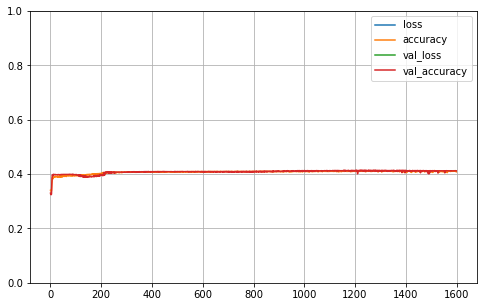

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [36]:
x = solubility_data[['NumHAcceptors','NumHDonors','TPSA','MolLogP']].values
y = solubility_data['solubility category'].copy()
y

0       slightly soluble
1       slightly soluble
2       slightly soluble
3       slightly soluble
4              insoluble
              ...       
9977    slightly soluble
9978    slightly soluble
9979    slightly soluble
9980    slightly soluble
9981           insoluble
Name: solubility category, Length: 9982, dtype: object

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le1 = LabelEncoder()
le1.fit(solubility_data['solubility category'].values)
list(le1.classes_)

['highly soluble', 'insoluble', 'slightly soluble', 'soluble']

In [39]:
y_encode1 = le1.transform(solubility_data['solubility category'].values)
y_encode1

array([2, 2, 2, ..., 2, 2, 1])

In [40]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y_encode1,
                                                    test_size=0.20,
                                                    random_state=111)

scaler = StandardScaler().fit(x_train_1)
x_train_norm_1 = scaler.transform(x_train_1)
x_test_norm_1 = scaler.transform(x_test_1)

In [41]:
def multi_nn():
    model = Sequential()
    #here we make an explicit input layer, it simply passes the input data to the later layer
    model.add(Input(shape=x_train_norm_1.shape[1]))
    #hidden layers
    model.add(Dense(13, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(13, kernel_initializer='normal', activation='tanh'))
    #output layer
    #for binary classification,we use sigmoid and 1 neuron in the output layer
    model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

#create a model object
classifier1 = multi_nn()

In [42]:
estimator1 = KerasClassifier(build_fn=multi_nn)
history1 = estimator1.fit(x_train_norm_1, y_train_1, validation_split=0.33, epochs=1600, batch_size=300,verbose=0)

In [43]:
test_loss1 = classifier1.evaluate(x_test_norm_1, y_test_1)
print("test set accuracy is %.4f" % test_loss1[1])

63/63 [==============================] - 0s 803us/step - loss: 1.3866 - accuracy: 0.1570
test set accuracy is 0.1673


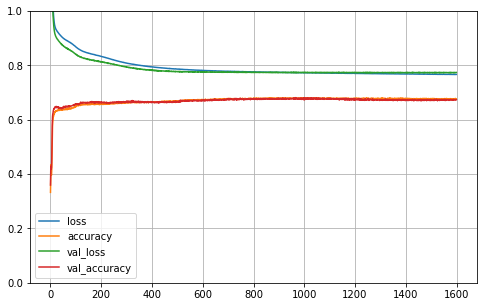

In [44]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [45]:
x2 = solubility_data[['NumHAcceptors','NumHDonors','TPSA','MolLogP','NumRotatableBonds','NumAromaticRings']].values
y2 = solubility_data['solubility category'].copy()
y2

0       slightly soluble
1       slightly soluble
2       slightly soluble
3       slightly soluble
4              insoluble
              ...       
9977    slightly soluble
9978    slightly soluble
9979    slightly soluble
9980    slightly soluble
9981           insoluble
Name: solubility category, Length: 9982, dtype: object

In [46]:
le2 = LabelEncoder()
le2.fit(solubility_data['solubility category'].values)
list(le2.classes_)

['highly soluble', 'insoluble', 'slightly soluble', 'soluble']

In [47]:
y_encode2 = le2.transform(solubility_data['solubility category'].values)
y_encode2

array([2, 2, 2, ..., 2, 2, 1])

In [48]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x2, y_encode2,
                                                    test_size=0.20,
                                                    random_state=111)

scaler = StandardScaler().fit(x_train_2)
x_train_norm_2 = scaler.transform(x_train_2)
x_test_norm_2 = scaler.transform(x_test_2)

In [49]:
def multi_nn2():
    model = Sequential()
    #here we make an explicit input layer, it simply passes the input data to the later layer
    model.add(Input(shape=x_train_norm_2.shape[1]))
    #hidden layers
    model.add(Dense(13, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(13, kernel_initializer='normal', activation='tanh'))
    #output layer
    #for binary classification,we use sigmoid and 1 neuron in the output layer
    model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

#create a model object
classifier2 = multi_nn2()

In [50]:
estimator2 = KerasClassifier(build_fn=multi_nn2)
history2 = estimator2.fit(x_train_norm_2, y_train_2, validation_split=0.33, epochs=1600, batch_size=300,verbose=0)

In [51]:
test_loss2 = classifier2.evaluate(x_test_norm_2, y_test_2)
print("test set accuracy is %.4f" % test_loss2[1])

63/63 [==============================] - 0s 703us/step - loss: 1.3859 - accuracy: 0.3201
test set accuracy is 0.3105


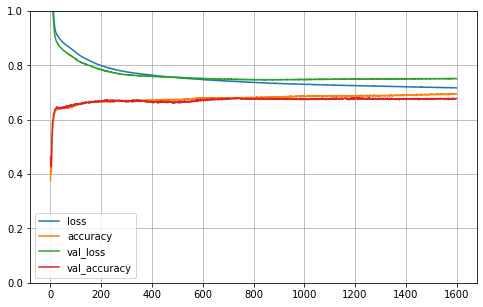

In [52]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

By using the multiclassification neural network, It was found that increasing the amount of the inputs(features) could help to improve the test accuracy. However, only four inputs were used because it took a lot of time to run the network and the accuracy was only about 0.34. Therefore, due the time consuming and lower accuracy, the best choice is among other methods. 

#### Decision Tree

In [53]:
category = []
#print(solubility_data["Solubility"])
for i in solubility_data["Solubility"]:
    if i >= 0:
        category.append('highly soluble')
    elif -2<=i<0:
        category.append('soluble')
    elif -4<=i<-2:
        category.append('slightly soluble')
    else:
        category.append('insoluble')       
solubility_data["solubility category"]=category

# filter out useful numerical data for training with their names
subset = solubility_data.loc[:, ~solubility_data.columns.isin(['ID', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD', 'Ocurrences', 'Group'])]
print(subset.keys()) # check columns
train_data = subset.loc[:, subset.columns != 'Name'] # take out name column
print(train_data.shape) # check again

Index(['Name', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT', 'solubility category'],
      dtype='object')
(9982, 18)


In [54]:
# filtering data into features and labels
features = train_data.loc[:, train_data.columns != 'solubility category']
labels = train_data['solubility category']

# separating train dataset and test data set
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.2)

# Name an untrained model
model = DecisionTreeClassifier(max_depth = 25)

# Train the training set features
model.fit(features_train, labels_train)

# Computation of training accuracy
train_predictions = model.predict(features_train)
print('Train Accuracy:', accuracy_score(labels_train, train_predictions))

# Computation of test accuracy
test_predictions = model.predict(features_test)
print('Test  Accuracy:', accuracy_score(labels_test, test_predictions))

Train Accuracy: 0.9941139636819035
Test  Accuracy: 0.6219328993490235


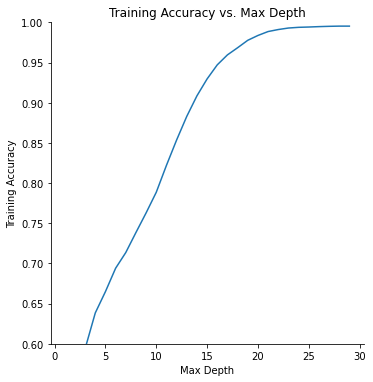

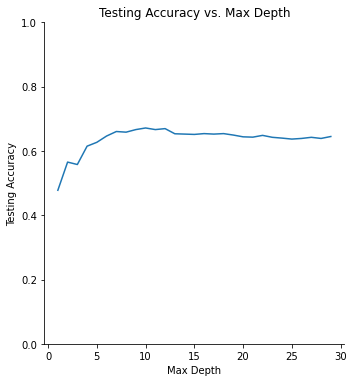

In [55]:
# This cell will use a for loop to explore the best tree depth for our model
# Now, spliting the data and indicate a "random state" to make the results repeatable
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.2, random_state=2)

accuracies = []
for i in range(1, 30, 1):
    model = DecisionTreeClassifier(max_depth=i, random_state=1)
    model.fit(features_train, labels_train)
    
    #training data test
    predicted_train = model.predict(features_train)
    train_accuraccy = accuracy_score(labels_train, predicted_train)
    #testing data test
    predicted_test = model.predict(features_test)
    test_accuraccy = accuracy_score(labels_test, predicted_test)
    
    # Useing a dictionary to store depth, train accuracy, and test accuracy
    accuracies.append({'max depth': i, 'train accuracy': train_accuraccy, 
                       'test accuracy': test_accuraccy})
    
accuracies = pd.DataFrame(accuracies) # transfer dictionary to a dataframe for later plotting
# print(accuracies)
# plot traing accuracy's relationship with tree depth
sns.relplot(kind='line', x='max depth', y= 'train accuracy', data = accuracies) # sns searches x and y's corresponding columns in a dataframe called accuracies
plt.title('Training Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Training Accuracy')
plt.ylim(0.6, 1)
plt.show()

#plot testing accuracy's relationship with tree depth
sns.relplot(kind='line', x='max depth', y= 'test accuracy', data = accuracies)
plt.title('Testing Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Testing Accuracy')
plt.ylim(0, 1)
plt.show()

According the two graphs, as I increase Max Depth of the decision tree, we notice an increasing training accuracy until the max depth reaches 20. And the testing accuary increases when the max depth increase from 0 to 10. It reach a testing accuracy around 0.65. Decisiontree Classifier shows a relatively good accuracy.

#### Unsupervised ML - SOM

In [56]:
category = []
category_num = []
#print(solubility_data["Solubility"])
for i in solubility_data["Solubility"]:
    if i >= 0:
        category.append('highly soluble')
        category_num.append(0)
    elif -2<=i<0:
        category.append('soluble')
        category_num.append(1)
    elif -4<=i<-2:
        category.append('slightly soluble')
        category_num.append(2)
    else:
        category.append('insoluble')       
        category_num.append(3)
solubility_data["solubility category"]=category
solubility_data["solubility category numerical"]=category_num

In [57]:
# filter out useful numerical data for training with their names
subset = solubility_data.loc[:, ~solubility_data.columns.isin(['ID', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD', 'Ocurrences', 'Group','solubility category numerical','solubility category'])]
# print(subset.keys()) # check columns
train_data = subset.loc[:, subset.columns != 'Name'].values # take out name column
print(train_data) # check again

[[392.51         3.9581     102.4454     ... 158.52060059   0.
  210.37733409]
 [169.183        2.4055      51.9012     ...  75.1835629    2.58299639
  511.22924772]
 [140.569        2.1525      36.8395     ...  58.26113356   3.00978195
  202.6610651 ]
 ...
 [150.221        2.82402     46.9328     ...  67.68540533   3.09271976
  251.04973179]
 [454.611        5.09308    131.656      ... 198.56922331   2.02333342
  938.203977  ]
 [308.333        3.6096      87.7318     ... 132.55202509   2.25807247
  909.55097269]]


In [58]:
train_data = (train_data - np.mean(train_data, axis=0)) / np.std(train_data, axis=0) # normalize training data
train_data.shape[1]

17

In [61]:
som_shape = (50,50)
som = MiniSom(som_shape[0], som_shape[1], train_data.shape[1], sigma=2, learning_rate=0.5,neighborhood_function='gaussian', random_seed=66)
som.pca_weights_init(train_data)
som.train_batch(train_data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.3622706536374694


Topographic error:  0.48727709877780007
Quantization error:  3.068954263347994


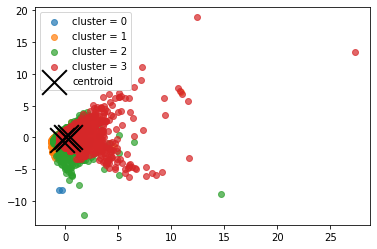

In [62]:
# This cell will use miniSom to cluster our dataset
som_cluster = (1,4) # We have 4 categories, so we only setup 4 neurons for SOM
# retrain Som with size of 1x4
som_2 = MiniSom(som_cluster[0], som_cluster[1], train_data.shape[1], sigma=0.5, learning_rate=0.5,neighborhood_function='gaussian', random_seed=66)
# we chose each of the 4 neurons to represent one clustering
winner_coordinates = np.array([som_2.winner(k) for k in train_data]).T
# this step is to convert data from bidimensional to monodimensional coordinate index
cluster_index = np.ravel_multi_index(winner_coordinates, som_cluster)

# we plotted the clusters useing the first two dimensions of data
for j in np.unique(cluster_index):
    plt.scatter(train_data[cluster_index == j, 0],
                train_data[cluster_index == j, 1], label = 'cluster = '+ str(j), alpha = 0.7)
# show centroids on the plot
for centroid in som_2.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=2, linewidths=35, color='k', label='centroid')
plt.legend()

# Compute the errors
print('Topographic error: ', som_2.topographic_error(train_data))
print('Quantization error: ', som_2.quantization_error(train_data))


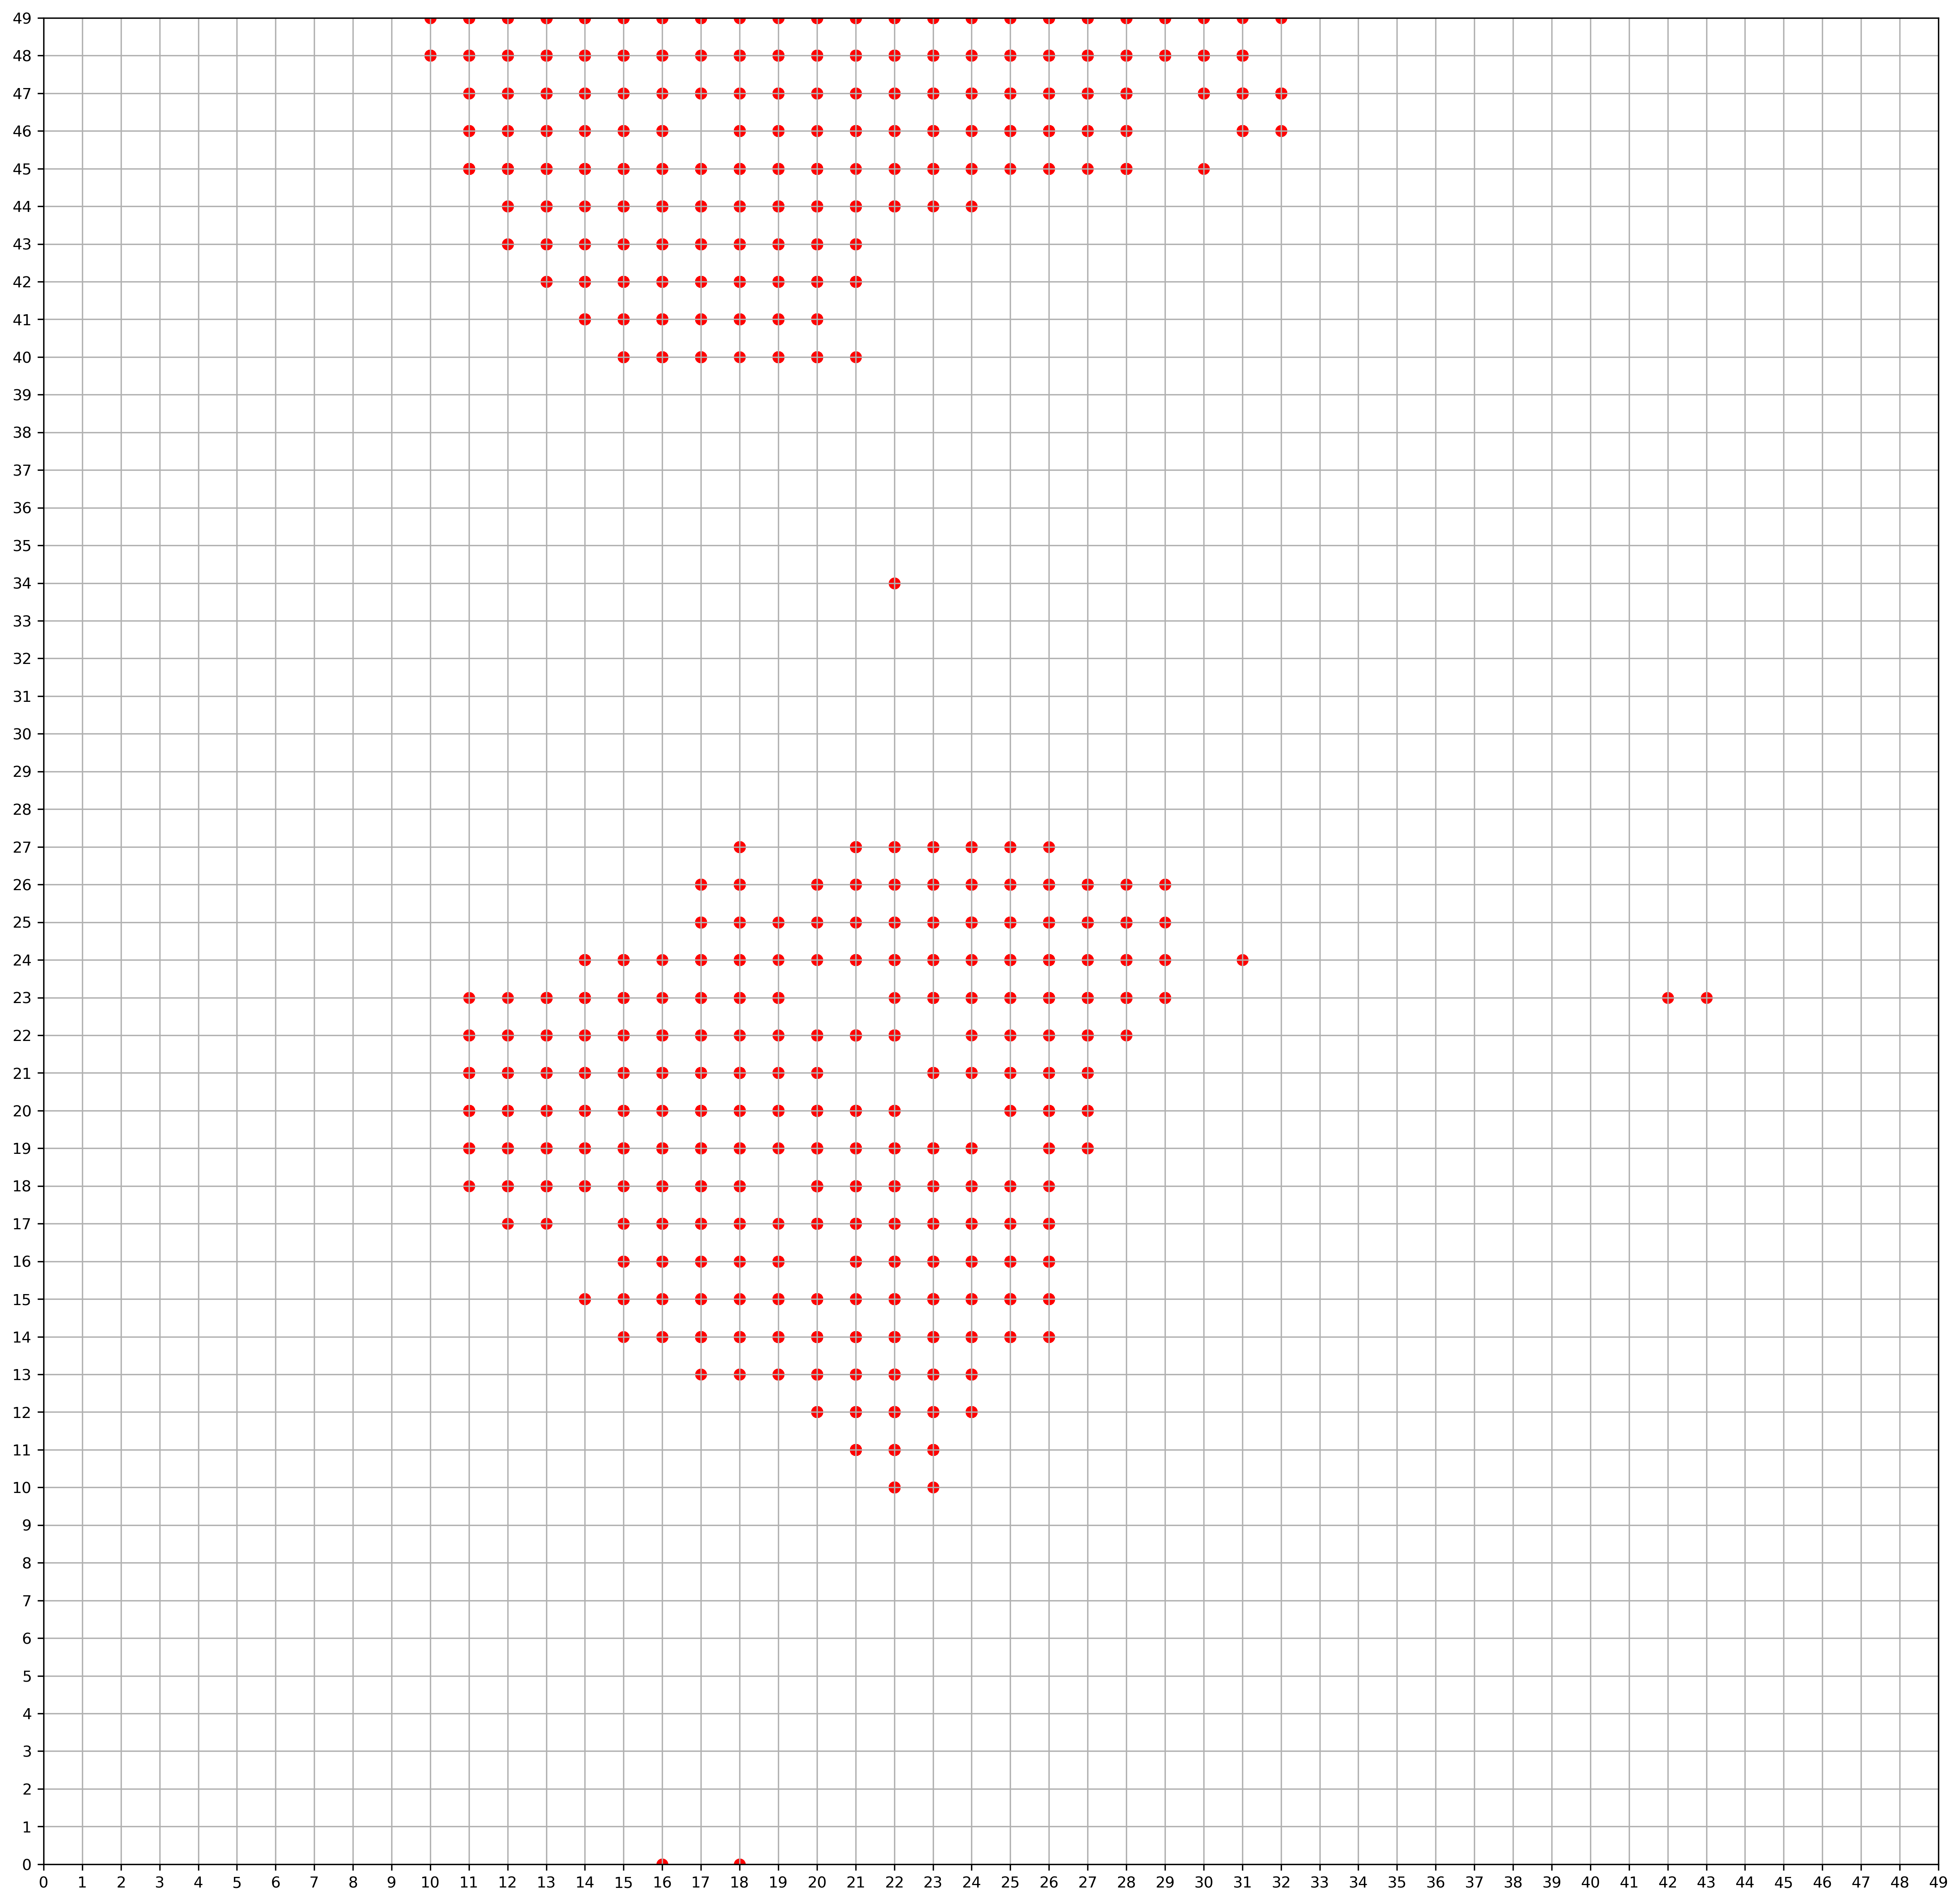

In [63]:
fig = plt.figure(figsize=(20, 20),dpi=300)
ax = fig.add_subplot(111)

# find the best matching unit of the datapoint and plot them on a scatter plot
for index, datapoint in enumerate(train_data):
    w = som.winner(datapoint)
    x_coord = w[0]
    y_coord = w[1]
    plt.scatter(x_coord,y_coord,c='red')
    
#visualize the grid    
plt.ylim(0,50-1)
plt.xlim(0,50-1)
ax.set_xticks(range(50))
ax.set_yticks(range(50))
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid()
plt.savefig("figure.png")

In [64]:
W = som.get_weights() # get weighted neuron outputs
X = W.reshape(2500,17) # reshape them into a 2D dataset. Because we had 50x50 neurons, the output data should be 2500
kmeans = KMeans(n_clusters=4,random_state=55).fit(X) # apply KMeans

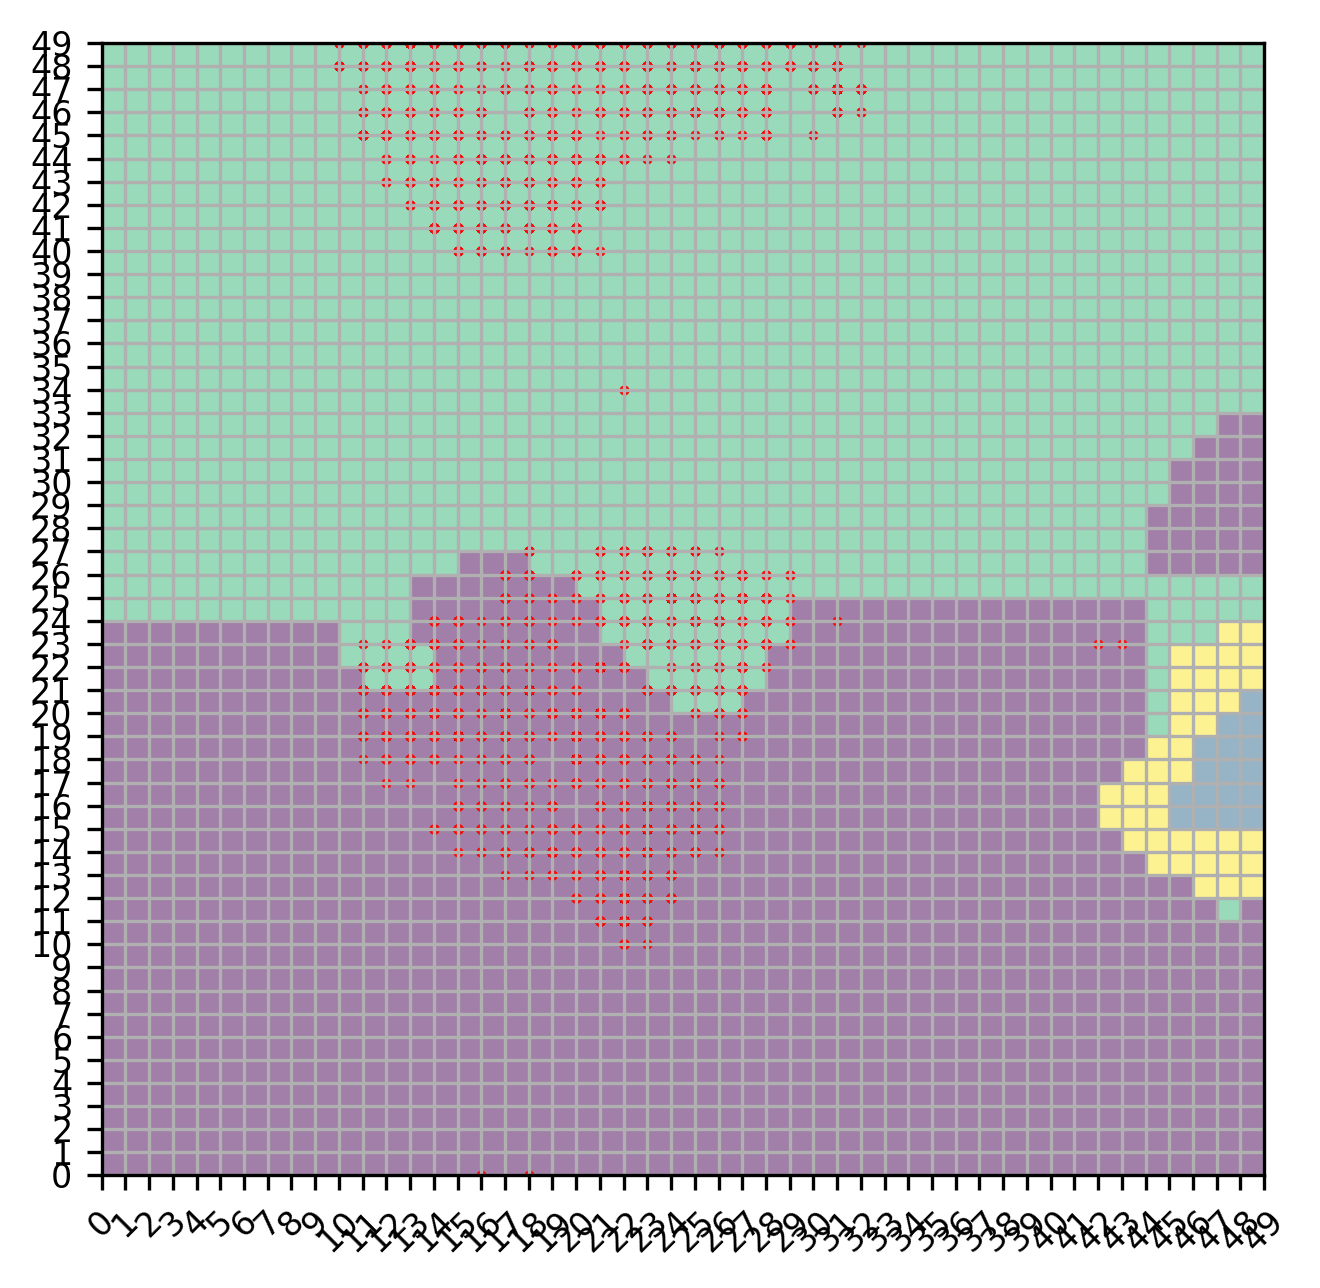

In [65]:
fig = plt.figure(figsize=(5, 5),dpi=300)
ax = fig.add_subplot(111)

# plot Kmeans map
plt.pcolor(kmeans.labels_.reshape(50,50),alpha=0.5)

# find the best matching unit of the datapoint and plot them on a scatter plot
for index, datapoint in enumerate(train_data):
    w = som.winner(datapoint)
    x_coord = w[0]
    y_coord = w[1]
    plt.scatter(x_coord,y_coord,c='red',s=2)
    
#visualize the grid    
plt.ylim(0,som_shape[0]-1)
plt.xlim(0,som_shape[1]-1)
ax.set_xticks(range(som_shape[0]))
ax.set_yticks(range(som_shape[1]))
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.grid()
plt.savefig("figure_cluster.png")

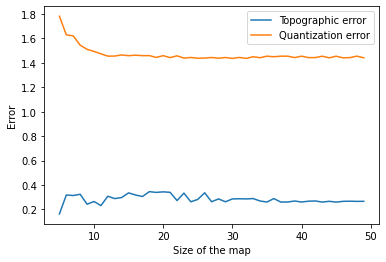

In [66]:
size_list = np.arange(5,50,1)
te = [0]*len(size_list)
qe = [0]*len(size_list)

# Use for l
for i in range(len(size_list)):
    som_size = MiniSom(size_list[i], size_list[i], train_data.shape[1], sigma=1.0, learning_rate=0.5,neighborhood_function='gaussian', random_seed=66)
    som_size.pca_weights_init(train_data)
    som_size.train(train_data, 500)
    te[i] = som_size.topographic_error(train_data)
    qe[i] = som_size.quantization_error(train_data)

plt.plot(size_list,te,label='Topographic error')
plt.plot(size_list,qe,label='Quantization error')
plt.xlabel('Size of the map')
plt.ylabel('Error')
plt.legend()
plt.show()

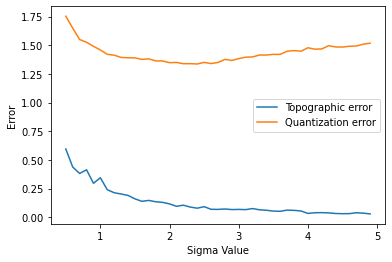

In [67]:
sigma_range = np.arange(0.5,5,0.1)

topo_error_sig = []
quant_error_sig = []
for i in sigma_range:
    som_sig = MiniSom(20, 20, train_data.shape[1], sigma=i, learning_rate=0.5,neighborhood_function='gaussian', random_seed=66)
    som_sig.pca_weights_init(train_data)
    som_sig.train(train_data, 500)
    topo_error_sig.append(som_sig.topographic_error(train_data))
    quant_error_sig.append(som_sig.quantization_error(train_data))

plt.plot(sigma_range,topo_error_sig,label='Topographic error')
plt.plot(sigma_range,quant_error_sig,label='Quantization error')
plt.xlabel('Sigma Value')
plt.ylabel('Error')
plt.legend()
plt.show()

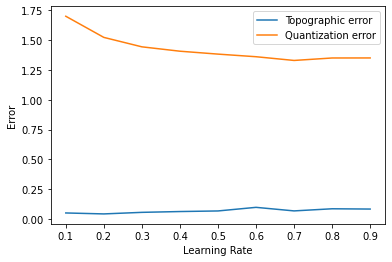

In [68]:
lr_range = np.arange(0.1,1,0.1)

topo_error_lr = []
quant_error_lr = []
for i in lr_range:
    som_lr = MiniSom(20, 20, train_data.shape[1], sigma=3, learning_rate=i,neighborhood_function='gaussian', random_seed=66)
    som_lr.pca_weights_init(train_data)
    som_lr.train(train_data, 500)
    topo_error_lr.append(som_lr.topographic_error(train_data))
    quant_error_lr.append(som_lr.quantization_error(train_data))
plt.plot(lr_range,topo_error_lr, label='Topographic error')
plt.plot(lr_range,quant_error_lr, label='Quantization error')
plt.xlabel('Learning Rate')
plt.ylabel('Error')
plt.legend()
plt.show()

SOM integrated with Kmeans did not show a great result. I found the kmeans clustering did not correspond with SOM on the grid map. SOM also had very bad quantization error not matter how well we optimize the parameters. SOM clustering only used 4 neurons to correspond our 4 types of classification, so the data only went through one neuron which made the model overall too simple, and the result couldn't be reliable. 

## Section 3

### Heat map and regression
According  to the heat-map, it has shown that non of a single single variable has a strong linear relationship with the extent of solubility. Therefore, multi-linear prediction would not have a strong prediction power. In this way, we used the polynomial fitting method to find the line that fits the data better. After adjusting the degree into four, the accuracy has achieved above 0.9. Therefore, it has proved that the features has a nonlinear relationship with the solubility. 

### Supervised Machine learning (ML) Methods

##### KNN Classification
For KNN Classification, I get a test accuracy about 0.60 when I use the six features that tightly related to solubility. I get test accuray around 0.65 when applying all meaningful features. Due to the complexity of factors that affect solubility, I think this result is acceptable. Also, it is noticeable that KNN classification has a short running time. This is another advantage to use KNN classification to classify materials. 

##### Neural Network
Neural Network shows a relative lower test accuracy at first. As we increase number of features from 2 to 6, test accuracy only increase from 0.2 to 0.24. This low test accuracy can not satisfy materials classfication based on aqueous solubility. At the same time, it requires relative long running time about several miniutes. 

##### Decision Tree
Decision tree method also give a good test accuracy. As we increase max depth, we can get a accuracy around 0.65 in the end. This corresponds to our results of the KNN classification method. Moreover, the test require a short time. 

### Unsupervised Machine learning (ML) Methods

##### SOM
I use SOM and integrated with Kmeans clustering. It takes a long time (more than 10 minutes) to run the test. However, the results shown on a grid map is inexplicable. The SOM also gives us very bad quantization error that can't improved with different parameters. A possible explantion is that there are too many features that interrelated with each other and they have a complex relationship with aqueous solubility. Alternatively, the relationship between features and solubility is too weak (shown on the heatmap) to drive a accurate clustering. So it also won't help to reduce dimension of dataset.

### Conclusion
From the result comparison of different models, it is generally found that the supervised ML methods have better performance than unsupervised ML methods. I think that the supervised ML learning algorithm uses training data to learn some correlation between input and output. Supervised ML has a goal to achieve, whereas unsupervised learning has no aim but relying on complex computations. In addition, in supervised ML knowing how many types to classify into, but unsupervised ML does not know how many types to classify into. Therefore, supervised methods, KNN and decisiontree classifier has a more accuracy and trustworthy output. 
